In [1]:
ls

 D 드라이브의 볼륨: 로컬 디스크
 볼륨 일련 번호: 46E7-B8C7

 D:\mj\big\AE 디렉터리

2020-09-21  오전 01:13    <DIR>          .
2020-09-21  오전 01:13    <DIR>          ..
2020-09-21  오전 01:09    <DIR>          .ipynb_checkpoints
2020-09-21  오전 01:03             4,097 AE.py
2020-09-21  오전 01:11            43,386 DeepAEtest.ipynb
2020-09-20  오후 08:41           770,556 Rec_user_item_matrix2.xlsx
2020-09-20  오후 09:48           573,332 Rec_user_item_matrix3.xlsx
2020-09-21  오전 01:13         2,583,623 SingleAEtest.ipynb
2020-09-20  오후 08:00             1,381 Untitled.ipynb
               6개 파일           3,976,375 바이트
               3개 디렉터리  433,572,868,096 바이트 남음


In [2]:
import pandas as pd
import numpy as np
data = pd.read_excel("Rec_user_item_matrix2.xlsx")

In [3]:
#X = data.reset_index().drop('user', axis = 1).rename(columns = {'index' : 'user'})

In [4]:
data

,user,0,1,2,3,4,5,6,7,8,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
0,1-0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,1-1,0.000000,0.0,0.0,0.0,4.382027,3.562466,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,1-10,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,1-11,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,1-12,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,6.807382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,9-23,3.433987,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
238,9-6,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.068904,0.0
239,9-7,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.248495,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
240,9-8,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [5]:
X = data.iloc[:,1:]

In [21]:
import tensorflow as tf
from tensorflow.keras import layers, losses
from tensorflow.keras import backend as K
import numpy as np

#(82x1133)
#57
class AutoEncoder(tf.keras.Model):
    def __init__(self, X_size, latent_dim):
        super(AutoEncoder, self).__init__()
        self.latent_dim = latent_dim
        self.X_size = X_size
        self.encoder = tf.keras.Sequential([
            layers.Dense(512, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(512, activation = 'selu', kernel_initializer='he_normal'),
            
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(256, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(256, activation = 'selu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(128, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(128, activation = 'selu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(latent_dim, activation = 'selu')
        ])
        self.decoder = tf.keras.Sequential([
            layers.Dense(128, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(128, activation = 'selu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(256, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(256, activation = 'selu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(512, activation = 'selu', kernel_initializer='he_normal'),
            layers.Dense(512, activation = 'selu', kernel_initializer='he_normal'),
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(X_size,activation = 'selu')
        ])
    
    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, _, _ = train_test_split(np.asarray(X),np.asarray(X),test_size=0.1,shuffle=False,random_state=1004)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [23]:

#

In [24]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

reduceLR = ReduceLROnPlateau( 
    monitor='loss',  # 모니터 기준 설정 val_loss? val_acc?
    factor=0.1,          # callback 호출시 학습률을 1/2로 줄인다
    patience=200,         # epoch 10 동안 개선되지 않으면 callback이 호출
)
earlystopping = EarlyStopping(monitor='loss',  # 모니터 기준 설정 (val_loss) 
                              patience=1000,         # 15회 Epoch동안 개선되지 않는다면 종료
                             )

In [25]:
tf.__version__

'2.3.0'

In [26]:
def masked_mse(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1)
    return masked_mse

def masked_rmse(y_true, y_pred):
        # masked function
        mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
        # masked squared error
        masked_squared_error = K.square(mask_true * (y_true - y_pred))
        masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
        return masked_mse

def masked_rmse_clip(y_true, y_pred):
    # masked function
    mask_true = K.cast(K.not_equal(y_true, 0), K.floatx())
    y_pred = K.clip(y_pred, 1, 10)
    # masked squared error
    masked_squared_error = K.square(mask_true * (y_true - y_pred))
    masked_mse = K.sqrt(K.sum(masked_squared_error, axis=-1) / K.maximum(K.sum(mask_true, axis=-1), 1))
    return masked_mse

In [27]:
autoencoder = AutoEncoder(x_train.shape[1], 64)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)
autoencoder.compile(optimizer=optimizer, loss=masked_rmse, metrics=[masked_rmse_clip]) 


hist = autoencoder.fit(x_train, x_train,
                epochs=20000,
                batch_size = 32,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks = [reduceLR,earlystopping])

Epoch 1/20000
7/7 [==============================] - 0s 67ms/step - loss: 4.5076 - masked_rmse_clip: 3.6379 - val_loss: 260.7263 - val_masked_rmse_clip: 4.6842
Epoch 2/20000
7/7 [==============================] - 0s 11ms/step - loss: 2.9861 - masked_rmse_clip: 2.4895 - val_loss: 679.7126 - val_masked_rmse_clip: 4.4645
Epoch 3/20000
7/7 [==============================] - 0s 10ms/step - loss: 2.7358 - masked_rmse_clip: 2.2650 - val_loss: 300.6991 - val_masked_rmse_clip: 4.4808
Epoch 4/20000
7/7 [==============================] - 0s 10ms/step - loss: 2.6012 - masked_rmse_clip: 2.1691 - val_loss: 313.6410 - val_masked_rmse_clip: 4.3402
Epoch 5/20000
7/7 [==============================] - 0s 10ms/step - loss: 2.4025 - masked_rmse_clip: 1.9883 - val_loss: 83.3122 - val_masked_rmse_clip: 4.4356
Epoch 6/20000
7/7 [==============================] - 0s 10ms/step - loss: 2.0264 - masked_rmse_clip: 1.7216 - val_loss: 36.0177 - val_masked_rmse_clip: 4.4332
Epoch 7/20000
7/7 [=======================

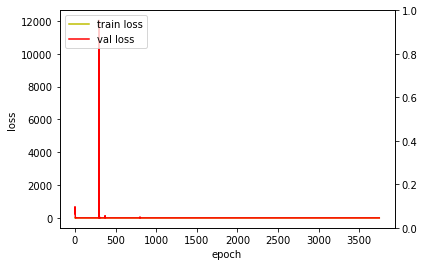

In [28]:

import matplotlib.pyplot as plt
%matplotlib inline

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')


loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

loss_ax.legend(loc='upper left')


plt.show()

In [29]:
encoded_num = autoencoder.encoder(np.asarray(X)).numpy()
decoded_num = autoencoder.decoder(encoded_num).numpy()

In [30]:
X

,0,1,2,3,4,5,6,7,8,9,...,1354,1355,1356,1357,1358,1359,1360,1361,1362,1363
0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.000000,0.0,0.0,0.0,4.382027,3.562466,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,6.807382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3.433987,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
238,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.068904,0.0
239,0.000000,0.0,0.0,0.0,0.000000,0.000000,4.248495,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
240,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [31]:
X_en = pd.DataFrame(decoded_num)

In [32]:
X_en

,0,1,2,3,4,5,6,7,8,9,...,1123,1124,1125,1126,1127,1128,1129,1130,1131,1132
0,3.162795,3.549181,5.424950,4.445983,3.682961,3.995072,4.789998,3.733076,5.136193,3.605582,...,6.634118,4.691152,3.780268,6.975286,6.019739,5.808646,6.201735,5.762266,5.549869,5.176567
1,3.177166,3.769907,5.365971,4.455867,4.408582,3.584104,4.699351,4.080843,5.166839,3.642022,...,6.750459,4.529566,3.605186,6.942569,6.189871,6.289524,6.416248,5.803993,5.697092,5.316196
2,2.773007,3.421046,5.221553,4.369159,4.743010,4.159807,4.678093,3.756993,5.047876,3.683034,...,6.798006,4.408247,3.600340,6.695005,6.328507,5.772645,6.442987,5.682650,5.659947,5.595658
3,3.001042,3.587472,5.359847,4.752669,4.373189,4.163568,4.759676,3.763787,5.047847,3.715727,...,6.761237,4.655202,3.757396,6.771892,6.280111,5.812274,6.308596,5.811702,5.885134,5.483344
4,2.801840,3.482439,5.226364,4.397661,4.566048,4.212917,4.667192,3.689014,5.087237,3.722116,...,6.807360,4.358904,3.653609,6.677842,6.298996,5.745090,6.405219,5.710045,5.945530,5.622086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,3.195832,3.959219,5.471031,4.460193,3.926933,4.236111,4.574107,3.857635,5.296823,3.759903,...,6.492419,4.852341,4.145330,6.692491,6.204761,6.423107,6.385299,5.681192,6.069511,5.512848
238,3.224504,3.944444,5.536887,4.542715,3.998122,4.158869,4.633177,3.936844,5.279953,3.728727,...,6.590647,4.772042,4.047843,6.746874,6.218952,6.403225,6.353591,5.720192,6.018148,5.503977
239,2.969035,3.699185,5.373759,4.467774,4.203856,4.223200,4.669830,3.782810,5.271415,3.759653,...,6.731520,4.502916,3.825502,6.677993,6.273502,6.023014,6.401793,5.802031,6.102663,5.657410
240,2.801682,3.590031,5.123455,4.001495,4.294486,3.986029,4.442940,3.699824,5.090750,3.800831,...,6.426110,4.252596,3.744518,6.513678,6.059184,5.829235,6.472895,5.536462,5.660815,5.571514


In [34]:
encoded_num.shape

(242, 64)

In [35]:
decoded_num.shape

(242, 1133)

-------------------------------------------------------------------------------------------------

In [115]:
x_test[1]*(x_test[1]-x_test[0])

array([50.,  0.,  0., ...,  0.,  0.,  0.], dtype=float32)

In [228]:

a = tf.constant([[0, 1], [2, 4]], dtype=tf.float32)
b = tf.constant([[1, 1], [1, 2]], dtype=tf.float32)

In [229]:
(a-b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-1.,  0.],
       [ 1.,  2.]], dtype=float32)>

In [230]:
a*(a-b)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-0.,  0.],
       [ 2.,  8.]], dtype=float32)>

In [244]:
tf.constant(list(map(lambda x : 1 if x != 0 else 0, np.array([1,2,3,10,0,0,]))))

<tf.Tensor: shape=(6,), dtype=int32, numpy=array([1, 1, 1, 1, 0, 0], dtype=int32)>